In [1]:
#PRACTICUM DANIEL BETANCOURT
#MODEL 1. PREDICT THE CASH THAT THE STARTUP NEEDS TO PROVISION TO HANDLE THE USERS WITHDRAWS

import numpy as np
import itertools
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
import statsmodels.api as sm
import matplotlib
print("import ok")

matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


import ok


In [12]:
#read file of transactions completed years
df = pd.read_csv("txs93-98.csv")
df.head

<bound method NDFrame.head of         trans_id  account_id    date      type operation  amount   balance
0         695247        2378  930101   DEPOSIT    CASHDP   700.0     700.0
1         171812         576  930101   DEPOSIT    CASHDP   900.0     900.0
2         207264         704  930101   DEPOSIT    CASHDP  1000.0    1000.0
3        1117247        3818  930101   DEPOSIT    CASHDP   600.0     600.0
4         579373        1972  930102   DEPOSIT    CASHDP   400.0     400.0
...          ...         ...     ...       ...       ...     ...       ...
734038    520031        1775  971231  WITHDRAW    CASHWD    14.6   23531.3
734039    517312        1767  971231  WITHDRAW    CASHWD    14.6   49026.8
734040    518251        1770  971231  WITHDRAW    CASHWD    14.6   70109.9
734041    519067        1772  971231  WITHDRAW    CASHWD    30.0  104802.8
734042    517906        1769  971231  WITHDRAW    CASHWD    14.6   16171.9

[734043 rows x 7 columns]>

In [13]:
#filter withdraws only, to detect how much cash needed even if no deposits
wths = df.loc[df['type'] == 'WITHDRAW']
wths.head

<bound method NDFrame.head of         trans_id  account_id    date      type  operation   amount   balance
136       695560        2378  930131  WITHDRAW     CASHWD  34700.0   59453.7
189       145127         485  930203  WITHDRAW     CASHWD  25300.0   46177.9
222      1028004        3510  930206  WITHDRAW     CASHWD   1600.0   22271.0
233       695340        2378  930207  WITHDRAW  BANKREMIT   9612.0   80033.7
249       622121        2122  930207  WITHDRAW     CASHWD  14100.0   32859.1
...          ...         ...     ...       ...        ...      ...       ...
734038    520031        1775  971231  WITHDRAW     CASHWD     14.6   23531.3
734039    517312        1767  971231  WITHDRAW     CASHWD     14.6   49026.8
734040    518251        1770  971231  WITHDRAW     CASHWD     14.6   70109.9
734041    519067        1772  971231  WITHDRAW     CASHWD     30.0  104802.8
734042    517906        1769  971231  WITHDRAW     CASHWD     14.6   16171.9

[436562 rows x 7 columns]>

In [14]:
#drop the other columns
cols = ['trans_id', 'account_id', 'type', 'operation', 'balance']
wths.drop(cols, axis=1, inplace=True)
wths['date'] =  pd.to_datetime(wths['date'], format = '%y%m%d')
wths = wths.sort_values('date')
wths.head

<bound method NDFrame.head of              date   amount
136    1993-01-31  34700.0
189    1993-02-03  25300.0
222    1993-02-06   1600.0
233    1993-02-07   9612.0
249    1993-02-07  14100.0
...           ...      ...
728202 1997-12-31     14.6
728203 1997-12-31     14.6
728204 1997-12-31     14.6
728206 1997-12-31     14.6
734042 1997-12-31     14.6

[436562 rows x 2 columns]>

In [15]:
#check no nulls
wths.isnull().sum()

date      0
amount    0
dtype: int64

In [16]:
#sum amounts by date
wths = wths.groupby('date')['amount'].sum().reset_index()
wths = wths.set_index('date')
wths.index
wths.head()

,amount
date,
1993-01-31,34700.0
1993-02-03,25300.0
1993-02-06,1600.0
1993-02-07,23712.0
1993-02-08,1500.0


In [17]:
#resample by weeks and the amount mean
wthsw = wths['amount'].resample('W').mean()
fulldata=wthsw
fulldata.count()

258

In [18]:
#split into test data and train data
size = int(len(fulldata) * 0.67)
traindata, testdata = fulldata[0:size], fulldata[size:len(fulldata)]
testdata.head

<bound method NDFrame.head of date
1996-05-19    1.096437e+06
1996-05-26    8.813243e+05
1996-06-02    1.057706e+06
1996-06-09    2.288287e+06
1996-06-16    2.593569e+06
                  ...     
1997-12-07    2.710893e+06
1997-12-14    4.309380e+06
1997-12-21    2.060634e+06
1997-12-28    1.968151e+06
1998-01-04    1.814277e+06
Freq: W-SUN, Name: amount, Length: 86, dtype: float64>

In [19]:
testdata.tail()

date
1997-12-07    2.710893e+06
1997-12-14    4.309380e+06
1997-12-21    2.060634e+06
1997-12-28    1.968151e+06
1998-01-04    1.814277e+06
Freq: W-SUN, Name: amount, dtype: float64

In [20]:
traindata.head()

date
1993-01-31    34700.000000
1993-02-07    16870.666667
1993-02-14    17220.000000
1993-02-21    29900.000000
1993-02-28    16982.920000
Freq: W-SUN, Name: amount, dtype: float64

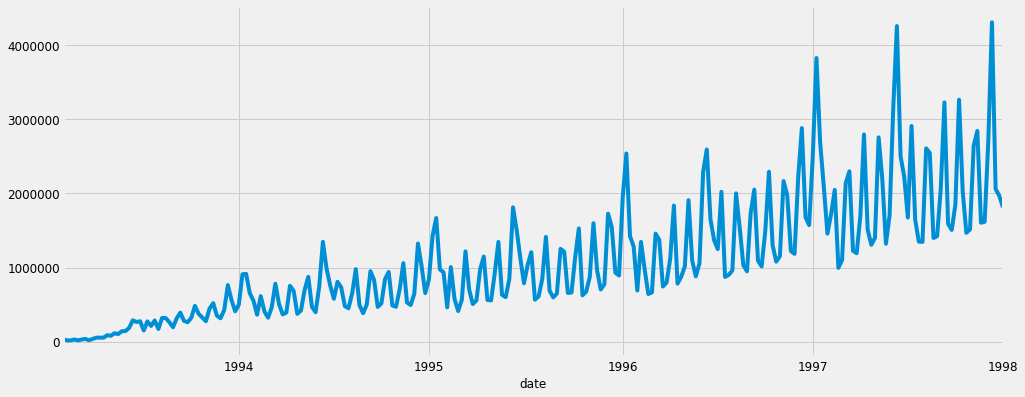

In [21]:
#plot data
fulldata.plot(figsize=(15, 6))
plt.show()

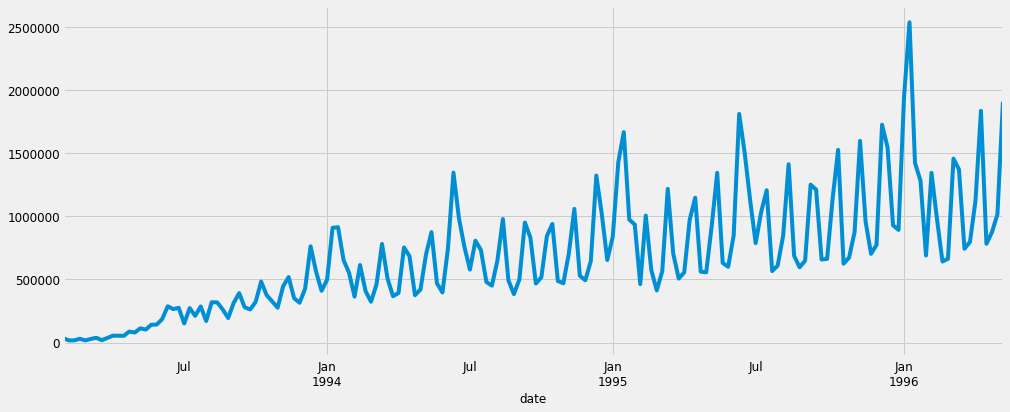

In [23]:
#plot train data
traindata.plot(figsize=(15, 6))
plt.show()

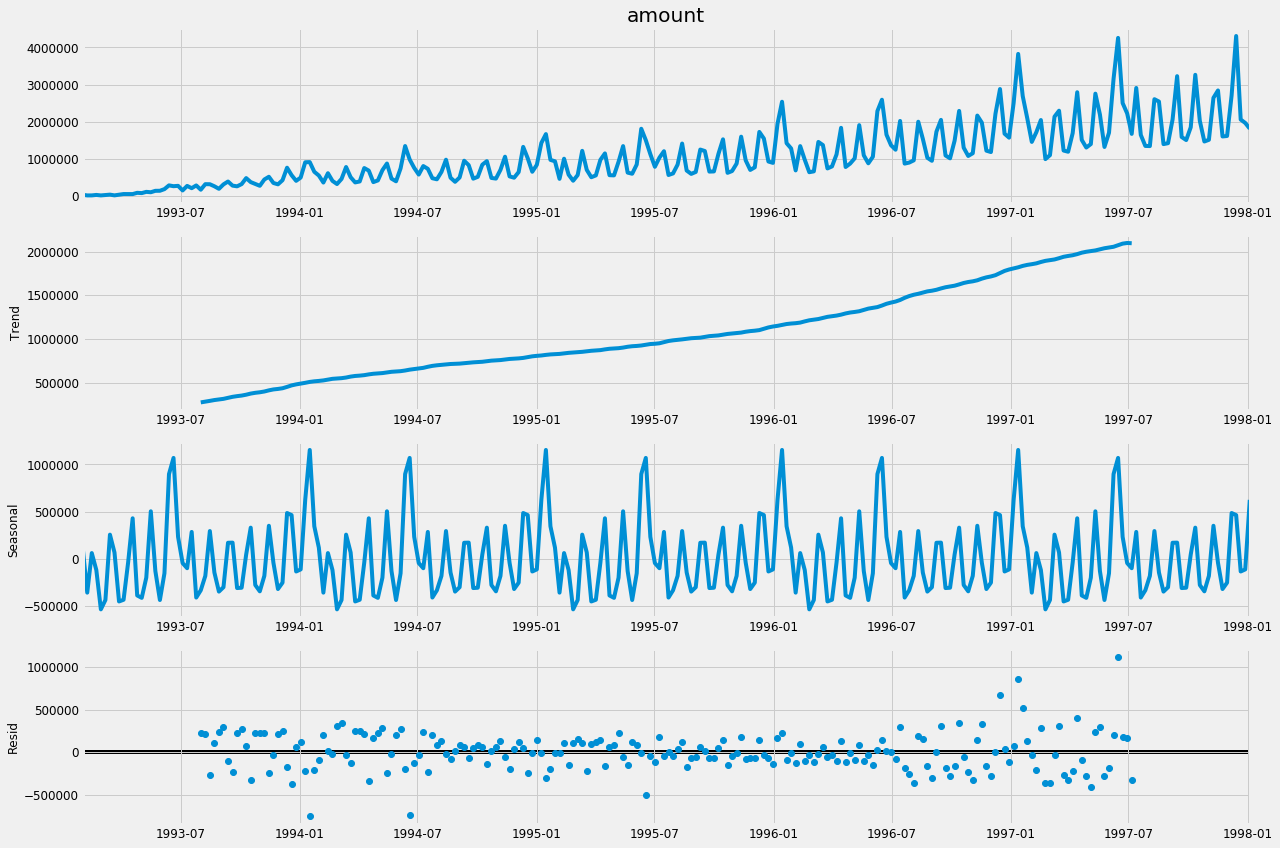

In [26]:
#show trends and seasonality
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12
decomp = sm.tsa.seasonal_decompose(fulldata, model='additive')
fig = decomp.plot()
plt.show()

In [54]:
#prepare multiple combinations of params
p = d = q = range(0, 2)
pdqvars = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 52) for x in pdqvars]

In [112]:
#check which combination has the lowest AIC
for param in pdqvars:
    for param_season in season_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(traindata,
                                            order=param,
                                            seasonal_order=param_season,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ORDERXSEASON_ORDER{}x{} AIC={}'.format(param, param_season, results.aic))
        except:
            continue

ORDERXSEASON_ORDER(0, 0, 0)x(0, 0, 0, 52) AIC=5177.455565452648
ORDERXSEASON_ORDER(0, 0, 0)x(0, 0, 1, 52) AIC=5174.666499762389
ORDERXSEASON_ORDER(0, 0, 0)x(0, 1, 0, 52) AIC=3447.317696355061
ORDERXSEASON_ORDER(0, 0, 0)x(0, 1, 1, 52) AIC=3409.066848964051
ORDERXSEASON_ORDER(0, 0, 0)x(1, 0, 0, 52) AIC=5054.381713075532
ORDERXSEASON_ORDER(0, 0, 0)x(1, 0, 1, 52) AIC=4962.312588577586
ORDERXSEASON_ORDER(0, 0, 0)x(1, 1, 0, 52) AIC=3405.5464997649806
ORDERXSEASON_ORDER(0, 0, 0)x(1, 1, 1, 52) AIC=3306.4367337247495
ORDERXSEASON_ORDER(0, 0, 1)x(0, 0, 0, 52) AIC=5076.613522764925
ORDERXSEASON_ORDER(0, 0, 1)x(0, 0, 1, 52) AIC=5058.46636976391
ORDERXSEASON_ORDER(0, 0, 1)x(0, 1, 0, 52) AIC=3382.6335602097333
ORDERXSEASON_ORDER(0, 0, 1)x(0, 1, 1, 52) AIC=3359.345129926941
ORDERXSEASON_ORDER(0, 0, 1)x(1, 0, 0, 52) AIC=5053.298911766653
ORDERXSEASON_ORDER(0, 0, 1)x(1, 0, 1, 52) AIC=5055.241628377964
ORDERXSEASON_ORDER(0, 0, 1)x(1, 1, 0, 52) AIC=3344.487069287565
ORDERXSEASON_ORDER(0, 0, 1)x(1, 1, 1, 

In [186]:
#train with best combinations and select the best 
arima_mod = sm.tsa.statespace.SARIMAX(traindata,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = arima_mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0790      0.109      0.727      0.467      -0.134       0.292
ma.L1         -0.8254      0.063    -13.056      0.000      -0.949      -0.702
ma.S.L52       0.9745      0.132      7.355      0.000       0.715       1.234
sigma2      1.918e+10   7.13e-12   2.69e+21      0.000    1.92e+10    1.92e+10


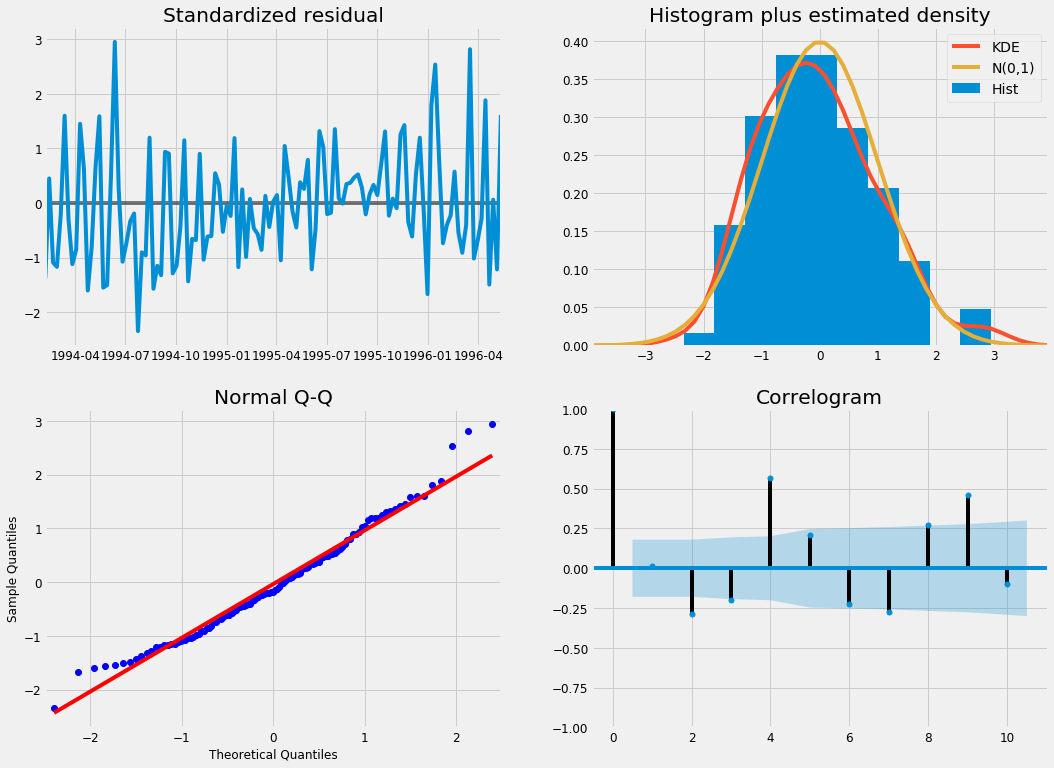

In [187]:
#check diagnostics in the model
results.plot_diagnostics(figsize=(16, 12))
plt.show()

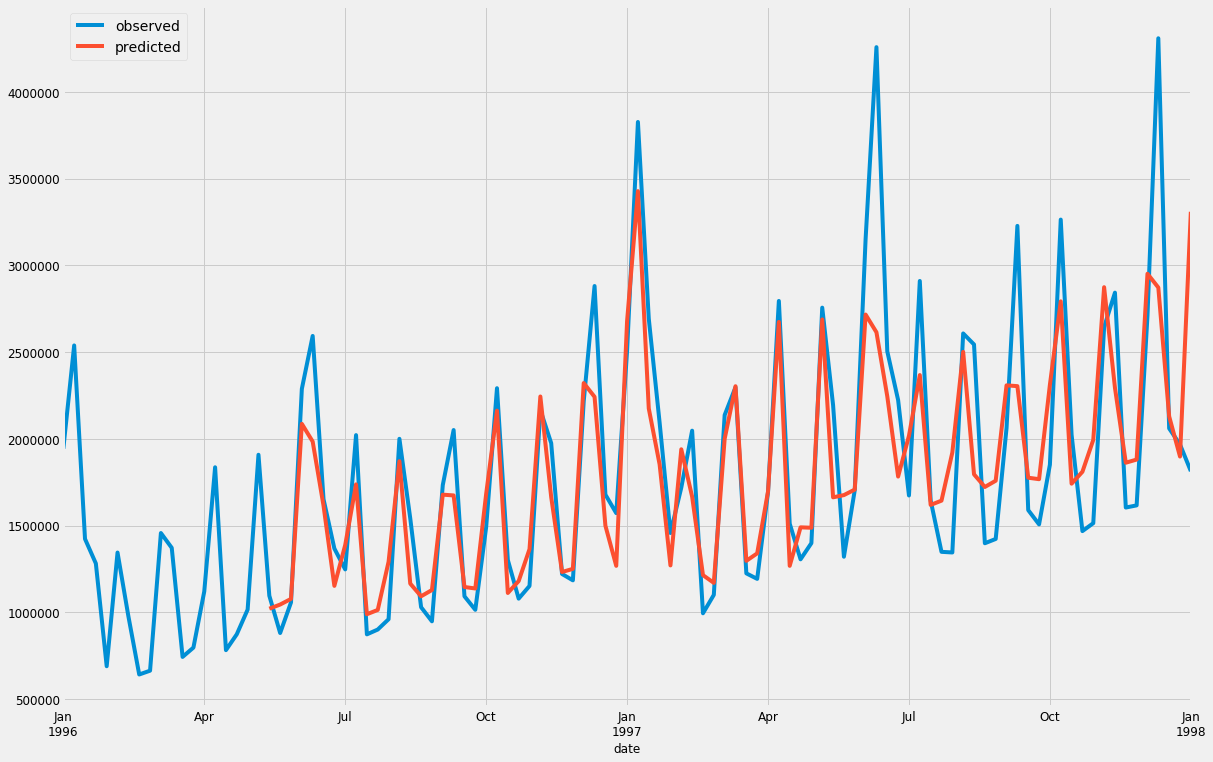

In [188]:
#prediction for the testdata range
pred = results.predict(start=pd.to_datetime('1996-05-19'), end=pd.to_datetime('1998-01-04'))

ax = fulldata['1996':].plot(label='observed')
ax2 = pred['1996':].plot(label='predicted')

plt.legend()
plt.show()

In [189]:
#calculate Model Root Mean Square Error
from statsmodels.tools.eval_measures import rmse
mserror=rmse(pred['1996-05-19':], testdata['1996-05-19':])
print('RMSE= {}'.format(round(mserror, 2)))

RMSE= 414274.28
